<a href="https://colab.research.google.com/github/udubishchak/gp2_group26/blob/main/eda_gp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Тема: "Вакансии и рынок труда"**

**Бизнес задача:**

Предсказание средней зарплаты для вакансий в различных отраслях по Москве.

**Для чего это нужно?**

-Компании и кандидаты смогут использовать этот прогноз для оценки зарплатных ожиданий и иметь более обьективное представление о зп на рынке.

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re
from collections import Counter

In [121]:
df = pd.read_csv('/content/df_API.csv')
df

,Vacancy,Salary_from,Salary_to,Salary_currency,Employer_name,Experience,Schedule,Published_at,URL,Description,Key_skills
0,Бизнес менеджер по странам СНГ,Не указана,Не указана,Не указана,Johnson & Johnson,От 3 до 6 лет,Полный день,2025-03-04T13:06:58+0300,https://hh.ru/vacancy/117943193,Sales management experience 5+ years (experien...,Не указано
1,Директор по информационным технологиям (CIO),Не указана,Не указана,Не указана,netPrint.ru,Более 6 лет,Полный день,2025-03-03T15:19:05+0300,https://hh.ru/vacancy/117902993,Опыт работы более 5 лет в сфере IT на руководя...,Не указано
2,Middle+ Manual QA engineer,Не указана,Не указана,Не указана,Концерн Телематика,От 3 до 6 лет,Полный день,2025-03-04T15:26:20+0300,https://hh.ru/vacancy/117953007,Опыт работы в тестировании не менее 3х лет. По...,"Регресcионное тестирование, Интеграционное тес..."
3,Golang Developer | Golang разработчик,Не указана,Не указана,Не указана,AliExpress,От 1 года до 3 лет,Полный день,2025-03-04T11:06:51+0300,https://hh.ru/vacancy/117934114,Опыт работы с высоконагруженными системами. Оп...,"Golang, Apache Kafka, Redis, PostgreSQL"
4,Специалист по тестированию,100000,NaN,RUR,Центр Информационных технологий Роскадастр-Инф...,От 1 года до 3 лет,Полный день,2025-03-04T16:04:24+0300,https://hh.ru/vacancy/117955586,Образование – высшее. Знание методологии тести...,Не указано
...,...,...,...,...,...,...,...,...,...,...,...
11995,HR-рекрутер/менеджер по подбору персонала/ рес...,60000,NaN,RUR,ЭстэйтЛига,Нет опыта,Полный день,2025-03-02T14:00:08+0300,https://hh.ru/vacancy/117635629,"Открытого, дружелюбного и жизнерадостного чело...",Не указано
11996,Ведущий менеджер по персоналу офиса,Не указана,Не указана,Не указана,Первый Бит,От 3 до 6 лет,Полный день,2025-03-03T10:27:04+0300,https://hh.ru/vacancy/117879162,Понимание основных принципов <highlighttext>HR...,Не указано
11997,HR-специалист,Не указана,Не указана,Не указана,Олимпийский,Более 6 лет,Удаленная работа,2025-02-03T23:29:43+0300,https://hh.ru/vacancy/116726027,Большое желание работать. Знания и опыт привет...,Не указано
11998,Руководитель отдела продаж В2В в Международную...,230000,NaN,RUR,Пак Галина Александровна,От 1 года до 3 лет,Полный день,2025-03-02T16:30:53+0300,https://hh.ru/vacancy/116854606,Имеет успешный опыт в B2B продажах. Умеет и лю...,"B2B Продажи, Развитие продаж, Ведение перегово..."


Проверка на дубликаты

Очищаем датафрейм df от дубликатов (полностью идентичных строк), поскольку они могут пересекаться, так как искали вакансиии по ключевым словам, а они могут совпадать.

In [122]:
df_new = df.drop_duplicates(ignore_index=True)
print(f"Удалено {len(df) - len(df_new)} дубликатов.")
df = df_new
df

Удалено 940 дубликатов.


,Vacancy,Salary_from,Salary_to,Salary_currency,Employer_name,Experience,Schedule,Published_at,URL,Description,Key_skills
0,Бизнес менеджер по странам СНГ,Не указана,Не указана,Не указана,Johnson & Johnson,От 3 до 6 лет,Полный день,2025-03-04T13:06:58+0300,https://hh.ru/vacancy/117943193,Sales management experience 5+ years (experien...,Не указано
1,Директор по информационным технологиям (CIO),Не указана,Не указана,Не указана,netPrint.ru,Более 6 лет,Полный день,2025-03-03T15:19:05+0300,https://hh.ru/vacancy/117902993,Опыт работы более 5 лет в сфере IT на руководя...,Не указано
2,Middle+ Manual QA engineer,Не указана,Не указана,Не указана,Концерн Телематика,От 3 до 6 лет,Полный день,2025-03-04T15:26:20+0300,https://hh.ru/vacancy/117953007,Опыт работы в тестировании не менее 3х лет. По...,"Регресcионное тестирование, Интеграционное тес..."
3,Golang Developer | Golang разработчик,Не указана,Не указана,Не указана,AliExpress,От 1 года до 3 лет,Полный день,2025-03-04T11:06:51+0300,https://hh.ru/vacancy/117934114,Опыт работы с высоконагруженными системами. Оп...,"Golang, Apache Kafka, Redis, PostgreSQL"
4,Специалист по тестированию,100000,NaN,RUR,Центр Информационных технологий Роскадастр-Инф...,От 1 года до 3 лет,Полный день,2025-03-04T16:04:24+0300,https://hh.ru/vacancy/117955586,Образование – высшее. Знание методологии тести...,Не указано
...,...,...,...,...,...,...,...,...,...,...,...
11055,HR-рекрутер/менеджер по подбору персонала/ рес...,60000,NaN,RUR,ЭстэйтЛига,Нет опыта,Полный день,2025-03-02T14:00:08+0300,https://hh.ru/vacancy/117635629,"Открытого, дружелюбного и жизнерадостного чело...",Не указано
11056,Ведущий менеджер по персоналу офиса,Не указана,Не указана,Не указана,Первый Бит,От 3 до 6 лет,Полный день,2025-03-03T10:27:04+0300,https://hh.ru/vacancy/117879162,Понимание основных принципов <highlighttext>HR...,Не указано
11057,HR-специалист,Не указана,Не указана,Не указана,Олимпийский,Более 6 лет,Удаленная работа,2025-02-03T23:29:43+0300,https://hh.ru/vacancy/116726027,Большое желание работать. Знания и опыт привет...,Не указано
11058,Руководитель отдела продаж В2В в Международную...,230000,NaN,RUR,Пак Галина Александровна,От 1 года до 3 лет,Полный день,2025-03-02T16:30:53+0300,https://hh.ru/vacancy/116854606,Имеет успешный опыт в B2B продажах. Умеет и лю...,"B2B Продажи, Развитие продаж, Ведение перегово..."


In [123]:
# Посмотрим есть ли не полные дубликаты, а просто одни и те же вакансии с одинаковыми ссылками, но с разными данными
duplicate_urls = df['URL'].value_counts() # Группируем вакансии по URL и считаем количество повторений
duplicate_urls = duplicate_urls[duplicate_urls > 1] # Оставляем только те, которые встречаются более 1 раза
duplicate_urls.to_frame()

,count
URL,
https://hh.ru/vacancy/117593415,4
https://hh.ru/vacancy/117780209,4
https://hh.ru/vacancy/117928952,4
https://hh.ru/vacancy/117862152,3
https://hh.ru/vacancy/117755816,3
...,...
https://hh.ru/vacancy/117909031,2
https://hh.ru/vacancy/117565765,2
https://hh.ru/vacancy/117682807,2


Такие есть и их много. попробуем удалить дубликаты вакансий по URL, оставляя ту, у которых заполнено больше всего данных

In [124]:
df[(df['URL'] == 'https://hh.ru/vacancy/117593415')]

,Vacancy,Salary_from,Salary_to,Salary_currency,Employer_name,Experience,Schedule,Published_at,URL,Description,Key_skills
3708,Руководитель по персоналу (HR),Не указана,Не указана,Не указана,Media Connect Group,От 3 до 6 лет,Полный день,2025-03-01T22:18:40+0300,https://hh.ru/vacancy/117593415,Важный плюс: ты будешь работать в тандеме с си...,Не указано
5881,Руководитель по персоналу (HR),Не указана,Не указана,Не указана,Media Connect Group,От 3 до 6 лет,Полный день,2025-03-01T22:18:40+0300,https://hh.ru/vacancy/117593415,Важный плюс: ты будешь работать в тандеме с си...,"Подбор персонала, Отбор персонала, Кадры, Перв..."
7768,Руководитель по персоналу (HR),Не указана,Не указана,Не указана,Media Connect Group,От 3 до 6 лет,Полный день,2025-03-04T22:18:40+0300,https://hh.ru/vacancy/117593415,Важный плюс: ты будешь работать в тандеме с си...,Не указано
10105,Руководитель по персоналу (HR),Не указана,Не указана,Не указана,Media Connect Group,От 3 до 6 лет,Полный день,2025-03-04T22:18:40+0300,https://hh.ru/vacancy/117593415,Опыт в <highlighttext>HR</highlighttext> от 3 ...,"Подбор персонала, Отбор персонала, Кадры, Перв..."


In [125]:
df.replace(["Не указано", "Не указана"], np.nan, inplace=True) # Заменяем "Не указано" и "Не указана" на NaN для удобства обработки
df["Filled_Columns_Count"] = df.notna().sum(axis=1) # Создаем столбец, который считает количество заполненных полей в каждой строке
df = df.sort_values(by=["URL", "Filled_Columns_Count"], ascending=[True, False])
df = df.drop_duplicates(subset=["URL"], keep="first") # Удаляем дубликаты, оставляя строку с наибольшим количеством заполненных данных
df.drop(columns=["Filled_Columns_Count"], inplace=True)

<ipython-input-125-17ee509df727>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-125-17ee509df727>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [126]:
df.shape

(9931, 11)

Смотрим далее на данные

In [128]:
df['Salary_currency'].value_counts() #смотрим какие есть валюты

,count
Salary_currency,
RUR,5455
USD,131
EUR,34
KZT,1


Так как у нас присутствует несколько разных валют, то мы переведем их все в самую популярную и показательную для нас - рубли

In [129]:
# для дальнейшей проверки выведем все строки, в которых валюла указана и не является рублем
df[(df['Salary_currency'] != 'RUR') & (df['Salary_currency'] != 'Не указана') & (df['Salary_currency'].notna())]

,Vacancy,Salary_from,Salary_to,Salary_currency,Employer_name,Experience,Schedule,Published_at,URL,Description,Key_skills
6435,Менеджер по продажам,3000,NaN,USD,WGG Marketing Management LLC,От 1 года до 3 лет,Удаленная работа,2025-03-04T11:15:51+0300,https://hh.ru/vacancy/114173529,"Желание много зарабатывать, а не просто получа...",NaN
751,Junior developer TypeScript (JavaScript),800,NaN,USD,Linked Helper,Нет опыта,Удаленная работа,2025-03-02T17:12:29+0300,https://hh.ru/vacancy/116105297,Базовые знания JavaScript. Базовые знания Type...,"JavaScript, TypeScript, Node.js, React, Postgr..."
10695,Technical Project Manager,NaN,3200,USD,Your Next Agency,Более 6 лет,Удаленная работа,2025-02-19T16:14:12+0300,https://hh.ru/vacancy/116224547,Любовь к своему делу и интерес к IT-сфере: важ...,NaN
558,Middle Frontend Developer (React.js),2000,4000,USD,Linked Helper,От 1 года до 3 лет,Удаленная работа,2025-02-03T09:52:34+0300,https://hh.ru/vacancy/116265249,Опыт работы Frontend-<highlighttext>разработчи...,NaN
712,Senior Frontend Developer (React.js),3500,5500,USD,Linked Helper,От 3 до 6 лет,Удаленная работа,2025-02-03T09:54:25+0300,https://hh.ru/vacancy/116265495,Опыт работы Frontend-<highlighttext>разработчи...,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1803,"Бизнес-ассистент (бизнес: маркетинг, IT, дистр...",1200,1500,EUR,Smart And Talented,Нет опыта,Удаленная работа,2025-03-04T16:48:51+0300,https://hh.ru/vacancy/117958219,Английский от B2. Высокий уровень интеллекта и...,"Управление бизнес процессами, Организаторские ..."
1656,Фронтенд разработчик (Angular),2500,NaN,USD,Шпилевский А.А.,От 3 до 6 лет,Удаленная работа,2025-03-04T17:43:31+0300,https://hh.ru/vacancy/117960617,Опыт работы с Angular от 3 лет. Знание TypeScr...,NaN
2346,"Операционный директор, небольшой инвестиционны...",NaN,5000,USD,Recruitment Boutique S.M.Art,От 3 до 6 лет,Полный день,2025-03-04T18:20:43+0300,https://hh.ru/vacancy/117962247,Опыт работы в операционном управлении инвестиц...,NaN
5272,Junior project manager/ Джуниор проджект менеджер,700,800,USD,"Reputation House Marketing Management, LLC",От 1 года до 3 лет,Удаленная работа,2025-03-04T19:58:22+0300,https://hh.ru/vacancy/117964423,Опыт работы в управлении проектами от 6 месяце...,NaN


In [130]:
# Словарь с для удобства округленными курсами валют
exchange_rates = {'USD': 90, 'EUR': 95, 'KZT': 0.18}

# Преобразуем Salary_from и Salary_to в числа, где возможно
df.loc[df['Salary_from'] != 'Не указана', 'Salary_from'] = df.loc[df['Salary_from'] != 'Не указана', 'Salary_from'].astype(float)
df.loc[df['Salary_to'] != 'Не указана', 'Salary_to'] = df.loc[df['Salary_to'] != 'Не указана', 'Salary_to'].astype(float)

# Конвертация в рубли для USD
df.loc[df['Salary_currency'] == 'USD', 'Salary_from'] *= exchange_rates['USD']
df.loc[df['Salary_currency'] == 'USD', 'Salary_to'] *= exchange_rates['USD']

# Конвертация в рубли для EUR
df.loc[df['Salary_currency'] == 'EUR', 'Salary_from'] *= exchange_rates['EUR']
df.loc[df['Salary_currency'] == 'EUR', 'Salary_to'] *= exchange_rates['EUR']

# Конвертация в рубли для KZT
df.loc[df['Salary_currency'] == 'KZT', 'Salary_from'] *= exchange_rates['KZT']
df.loc[df['Salary_currency'] == 'KZT', 'Salary_to'] *= exchange_rates['KZT']

# Меняем все валюты на 'RUR' (рубли)
df['Salary_currency'] = 'RUR'
df.head()

,Vacancy,Salary_from,Salary_to,Salary_currency,Employer_name,Experience,Schedule,Published_at,URL,Description,Key_skills
295,Middle Manual QA,NaN,NaN,RUR,DatsTeam,От 1 года до 3 лет,Удаленная работа,2025-02-10T09:26:01+0300,https://hh.ru/vacancy/100374713,"Опыт тестирования API (JSON, REST API), fronte...",NaN
1011,Наладчик на производство (лазерная маркировка),NaN,100000.0,RUR,Каллисто Вижн,От 1 года до 3 лет,Полный день,2025-02-18T19:05:19+0300,https://hh.ru/vacancy/100403885,Высшее или средне-техническое образование. Зна...,NaN
7523,Account Manager,NaN,NaN,RUR,DIDENOK TEAM,От 1 года до 3 лет,Полный день,2025-02-18T17:35:05+0300,https://hh.ru/vacancy/100507771,Стаж работы от 2-х лет в рекламных агентствах ...,"Креативность, Маркетинговые коммуникации, Упра..."
313,"Senior front-end разработчик (TypeScript, React)",320000.0,460000.0,RUR,Mindbox,От 3 до 6 лет,Полный день,2025-02-11T17:57:34+0300,https://hh.ru/vacancy/101125199,NaN,NaN
5066,Менеджер по подбору и проценке автозапчастей в...,160000.0,200000.0,RUR,Техцентр «Автопилот»,От 1 года до 3 лет,Сменный график,2025-03-03T10:09:48+0300,https://hh.ru/vacancy/101615342,Опыт работы от 1 года. Уверенный пользователь ...,NaN


In [131]:
# для дальнейшей проверки выведем все строки, в которых валюла указана и не является рублем (таких строк теперь быть не должно)
df[(df['Salary_currency'] != 'RUR') & (df['Salary_currency'] != 'Не указана') & (df['Salary_currency'].notna())]

,Vacancy,Salary_from,Salary_to,Salary_currency,Employer_name,Experience,Schedule,Published_at,URL,Description,Key_skills


Теперь признак "валюта" не имеет никакой смысловой нагрузки, ведь имеет только одно возможное значение. Соответственно можем удалить этот столбец. Аналогично не несет особой информации столбец "Description" , так как он содержит какое-то количество произвольно написанного текста и из него очень сложно что-то дельное вычленить с помощью известных нам способов. Его тоже удаляем.

In [132]:
df = df.drop(columns=['Salary_currency'])
df = df.drop(columns=['Description'])
df

,Vacancy,Salary_from,Salary_to,Employer_name,Experience,Schedule,Published_at,URL,Key_skills
295,Middle Manual QA,NaN,NaN,DatsTeam,От 1 года до 3 лет,Удаленная работа,2025-02-10T09:26:01+0300,https://hh.ru/vacancy/100374713,NaN
1011,Наладчик на производство (лазерная маркировка),NaN,100000.0,Каллисто Вижн,От 1 года до 3 лет,Полный день,2025-02-18T19:05:19+0300,https://hh.ru/vacancy/100403885,NaN
7523,Account Manager,NaN,NaN,DIDENOK TEAM,От 1 года до 3 лет,Полный день,2025-02-18T17:35:05+0300,https://hh.ru/vacancy/100507771,"Креативность, Маркетинговые коммуникации, Упра..."
313,"Senior front-end разработчик (TypeScript, React)",320000.0,460000.0,Mindbox,От 3 до 6 лет,Полный день,2025-02-11T17:57:34+0300,https://hh.ru/vacancy/101125199,NaN
5066,Менеджер по подбору и проценке автозапчастей в...,160000.0,200000.0,Техцентр «Автопилот»,От 1 года до 3 лет,Сменный график,2025-03-03T10:09:48+0300,https://hh.ru/vacancy/101615342,NaN
...,...,...,...,...,...,...,...,...,...
6400,Маркетолог-аналитик,NaN,NaN,Московский аэропорт Домодедово,От 3 до 6 лет,Полный день,2025-03-04T15:49:23+0300,https://hh.ru/vacancy/97240641,"Английский язык, Анализ данных, Аналитические ..."
5536,Менеджер по оптовым продажам (без холодного по...,200000.0,400000.0,СМАРТКОМПЛЕКТ,От 1 года до 3 лет,Полный день,2025-02-04T10:07:02+0300,https://hh.ru/vacancy/97985175,NaN
625,Менеджер по продажам IT решений,150000.0,NaN,TAURUS,От 1 года до 3 лет,Полный день,2025-03-02T19:35:07+0300,https://hh.ru/vacancy/98852136,NaN
1064,Младший Разработчик С++,100000.0,NaN,TrueConf,Нет опыта,Полный день,2025-02-20T17:39:15+0300,https://hh.ru/vacancy/99067076,NaN


Проверка пропусков

In [133]:
df.replace("Не указана", np.nan, inplace=True)
df.replace("Не указано", np.nan, inplace=True)
df.isnull().sum()

,0
Vacancy,0
Salary_from,4839
Salary_to,6739
Employer_name,0
Experience,0
Schedule,0
Published_at,0
URL,0
Key_skills,8266


In [134]:
# Количество и процент пропущенных значений
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_data, '% of Total Values': missing_percent})
missing_info.sort_values(by='% of Total Values', ascending=False)

,Missing Values,% of Total Values
Key_skills,8266,83.234317
Salary_to,6739,67.858222
Salary_from,4839,48.726211
Vacancy,0,0.000000
Employer_name,0,0.000000
Experience,0,0.000000
Schedule,0,0.000000
Published_at,0,0.000000
URL,0,0.000000


In [135]:
# Обработка пропусков в колонках "Salary_from", "Salary_to"
# Заменим "Не указэана" на NaN для корректной обработки

df['Salary_from'] = df['Salary_from'].replace(np.nan, 'Не указана')
df['Salary_to'] = df['Salary_to'].replace(np.nan, 'Не указана')

df = df[~((df['Salary_from'] == 'Не указана') & (df['Salary_to'] == 'Не указана'))]

# Заполнение пропущенных значений в Salary_from и Salary_to
for index, row in df.iterrows():
    if pd.isna(row['Salary_from']) and not pd.isna(row['Salary_to']):
        df.loc[index, 'Salary_from'] = row['Salary_to']
    elif pd.isna(row['Salary_to']) and not pd.isna(row['Salary_from']):
        df.loc[index, 'Salary_to'] = row['Salary_from']


# Заполнение пропусков в колонке "Key_skills"
df['Key_skills'] = df['Key_skills'].fillna('Не указано')

<ipython-input-135-8600010cdea4>:16: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-135-8600010cdea4>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-135-8600010cdea4>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



посмотрим на ключевые наывыки

                                           Skill  Count
28                         Телефонные переговоры     99
44                            Продвижение бренда     92
25                              Активные продажи     85
3                               Работа в команде     85
73                        Организаторские навыки     84
124                            Деловая переписка     83
53                       Маркетинговая стратегия     83
90                               Деловое общение     82
70                              Подбор персонала     70
89                          Деловая коммуникация     68
24                                   B2B Продажи     65
94                               Английский язык     64
95                                Грамотная речь     60
169                           Интернет-маркетинг     59
305  Анализ эффективности маркетинговых кампаний     58
351                   Маркетинговые коммуникации     56
80           Работа с большим объемом информации

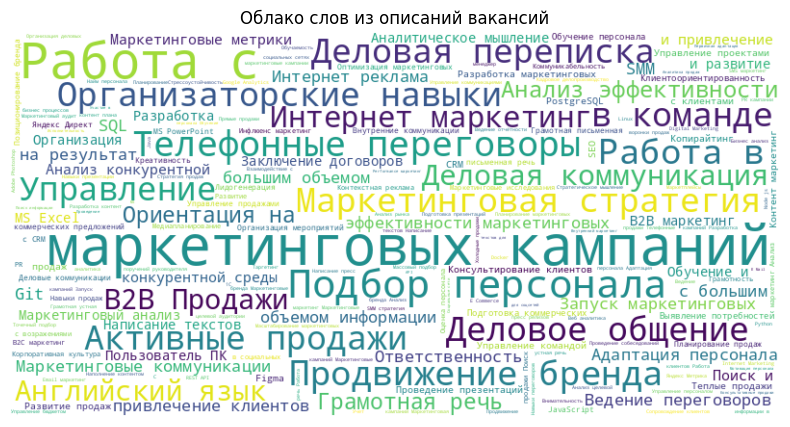

In [138]:
# Функция для извлечения навыков и подсчета их частоты
def extract_and_count_skills(df, column_name):
    # Исключаем "Не указано" и NaN
    filtered_df = df.loc[df[column_name].notna() & (df[column_name] != 'Не указано'), column_name]

    skills = filtered_df.str.split(', ', expand=False)

    skills_counts = {}
    for skill_list in skills:
        for skill in skill_list:
            if skill in skills_counts:
                skills_counts[skill] += 1
            else:
                skills_counts[skill] = 1

    skills_df = pd.DataFrame(list(skills_counts.items()), columns=['Skill', 'Count'])
    skills_df = skills_df.sort_values(by='Count', ascending=False)
    return skills_df

key_skills_df = extract_and_count_skills(df, 'Key_skills')

# Выводим топ-20 навыков
print(key_skills_df.head(20))
# Создаем столбчатую диаграмму для топ-20 навыков
fig = px.bar(key_skills_df.head(20), x='Skill', y='Count', title='Топ-20 ключевых навыков')
fig.show()

from wordcloud import WordCloud
# Исключаем "Не указано" перед объединением текста
filtered_skills = df.loc[df['Key_skills'].notna() & (df['Key_skills'] != 'Не указано'), 'Key_skills']
text = ' '.join(filtered_skills.astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов из описаний вакансий')
plt.show()


Теперь выполним первичную визуализацию данных, чтобы сделать наши признаки нагляднее

In [139]:
print(df['Employer_name'].value_counts().head(20))

# Визуализация топ-20 работодателей (plotly express):
employer_counts = df['Employer_name'].value_counts().nlargest(20)
fig_employer = px.bar(x=employer_counts.index, y=employer_counts.values,
                     title='Топ-20 Работодателей',
                     labels={'x': 'Работодатель', 'y': 'Количество вакансий'})
fig_employer.show()

print(df['Experience'].value_counts())

# Визуализация опыта работы (plotly pie chart):
experience_counts = df['Experience'].value_counts()
fig_experience = px.pie(values=experience_counts.values, names=experience_counts.index,
                       title='Распределение вакансий по опыту работы')
fig_experience.show()

Employer_name
RecruitTech                        22
Mindbox                            15
HR.PIVOT                           11
Первый Бит                         11
HR Helper (ООО Бизнес Партнер)      9
Sminex                              9
Банк ВТБ (ПАО)                      9
Changellenge                        9
Точка                               9
СИНЕРГИЯ                            8
ДЖЕЙКЕТ РАБОТА                      8
Агентство лучших кадров PROYARD     8
Группа компаний МЕДСИ               8
Revoluterra                         8
HR MEDICAL                          8
Wanted                              8
Wapi OÜ                             7
HR СНАЙПЕР                          7
Агентство Недвижимости Инфинити     7
Дэстэн Партнерс                     7
Name: count, dtype: int64


Experience
От 1 года до 3 лет    2917
От 3 до 6 лет         1478
Нет опыта              976
Более 6 лет            250
Name: count, dtype: int64


Далее для удобства перекодируем некоторые категориальные признаки

In [140]:
df['Experience'].unique() # уникальные значения требуемого опыта работы

array(['От 1 года до 3 лет', 'От 3 до 6 лет', 'Нет опыта', 'Более 6 лет'],
      dtype=object)

Мы видим, что для признака - опыт, идеально подойдет метод Label Encoding, так как видна иерархия

In [141]:
from sklearn.preprocessing import LabelEncoder
# Применение функции к столбцу 'Experience'
df['Experience'] = df['Experience'].apply(recode_experience)

# Определяем порядок для label encoding
experience_order = [
    'Нет опыта',
    'От 1 до 3 лет',
    'От 3 до 6 лет',
    'Более 6 лет',
    'Другое'
]

# Создаем label encoder и фиттим его на упорядоченные значения
encoder = LabelEncoder()
encoder.fit(experience_order)

# Кодируем столбец Experience
df['Experience'] = encoder.transform(df['Experience'])

<ipython-input-141-563b98bff836>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-141-563b98bff836>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [142]:
df['Schedule'].unique() # уникальные значения требуемого опыта работы

array(['Полный день', 'Сменный график', 'Удаленная работа',
       'Гибкий график', 'Вахтовый метод'], dtype=object)

А вот для признака расписание будет удобнее использовать OneHot encoding

In [143]:
df = pd.get_dummies(df, columns=['Schedule'])
# Преобразование булевых значений в целые числа
df = df.astype({col: 'int' for col in df.columns if col.startswith('Schedule')})

Проверим что получилось

In [144]:
df

,Vacancy,Salary_from,Salary_to,Employer_name,Experience,Published_at,URL,Key_skills,Schedule_Вахтовый метод,Schedule_Гибкий график,Schedule_Полный день,Schedule_Сменный график,Schedule_Удаленная работа
1011,Наладчик на производство (лазерная маркировка),NaN,100000.0,Каллисто Вижн,3,2025-02-18T19:05:19+0300,https://hh.ru/vacancy/100403885,Не указано,0,0,1,0,0
313,"Senior front-end разработчик (TypeScript, React)",320000.0,460000.0,Mindbox,4,2025-02-11T17:57:34+0300,https://hh.ru/vacancy/101125199,Не указано,0,0,1,0,0
5066,Менеджер по подбору и проценке автозапчастей в...,160000.0,200000.0,Техцентр «Автопилот»,3,2025-03-03T10:09:48+0300,https://hh.ru/vacancy/101615342,Не указано,0,0,0,1,0
4061,Координатор лечения в стоматологию/менеджер по...,200000.0,NaN,Еврокаппа,3,2025-02-07T17:08:54+0300,https://hh.ru/vacancy/103128136,Не указано,0,0,1,0,0
2954,Аккаунт-менеджер/Менеджер по работе с клиентами,150000.0,NaN,Бидзаар,3,2025-03-04T14:51:09+0300,https://hh.ru/vacancy/103233776,Не указано,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9273,Менеджер по управлению проектами дорожно-транс...,150000.0,NaN,Вартон,3,2025-03-03T11:47:54+0300,https://hh.ru/vacancy/95891536,Не указано,0,0,1,0,0
5024,Менеджер онлайн-продаж,100000.0,200000.0,"ЦУМ, ТД",3,2025-02-24T13:08:47+0300,https://hh.ru/vacancy/96705340,Не указано,0,0,1,0,0
5536,Менеджер по оптовым продажам (без холодного по...,200000.0,400000.0,СМАРТКОМПЛЕКТ,3,2025-02-04T10:07:02+0300,https://hh.ru/vacancy/97985175,Не указано,0,0,1,0,0
625,Менеджер по продажам IT решений,150000.0,NaN,TAURUS,3,2025-03-02T19:35:07+0300,https://hh.ru/vacancy/98852136,Не указано,0,0,1,0,0


Построим еще графики для отслеживания зависимостей

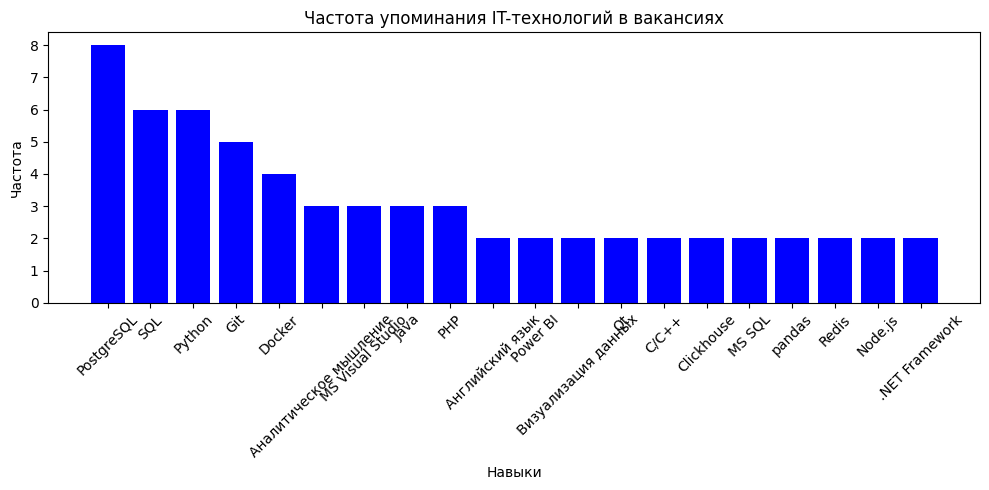

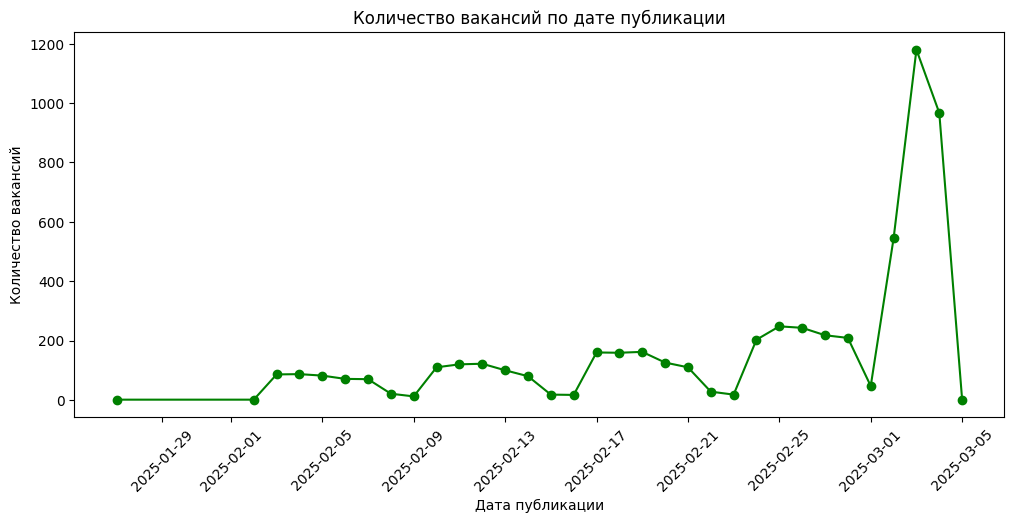

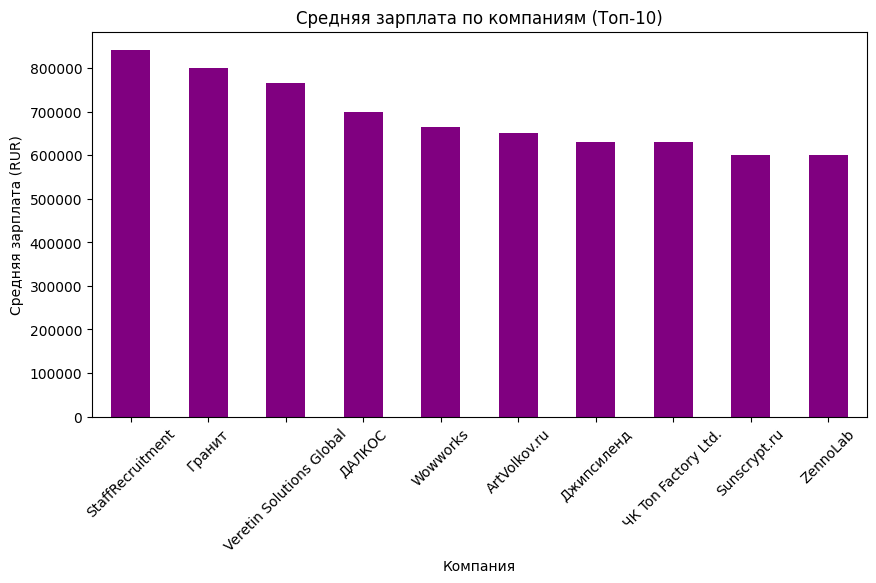

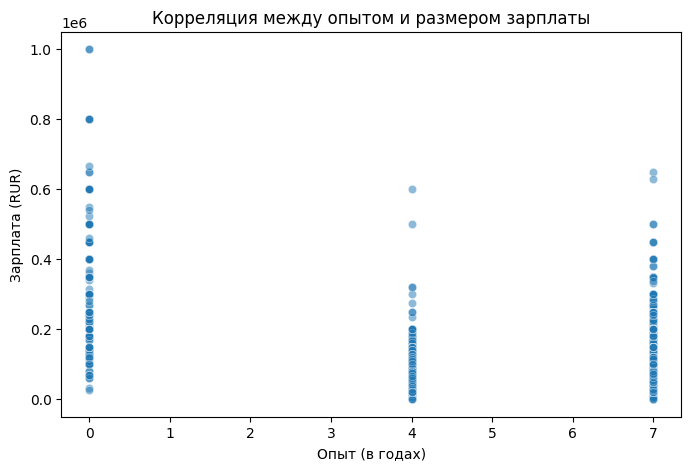

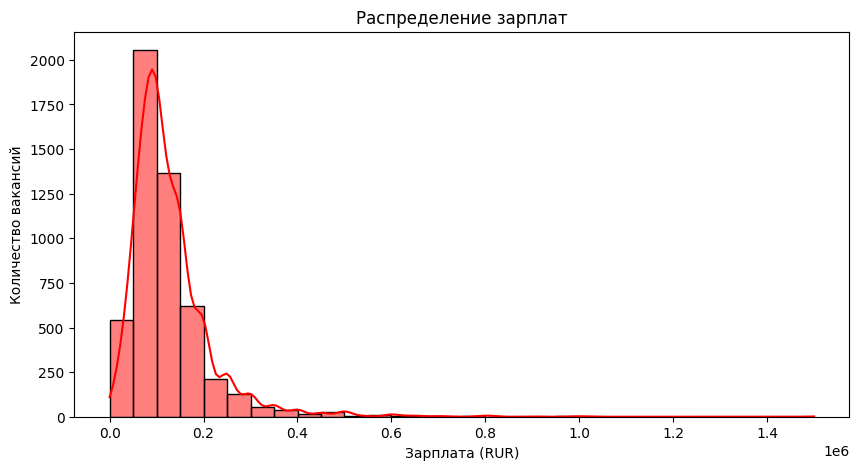

Самые редкие ключевые навыки:
                              Skill  Count
0                          Teradata      1
1                    Apache Airflow      1
2                         Data Lens      1
3                           Tableau      1
4                            Redash      1
5                          Metabase      1
6                            Bitrix      1
7                      Креативность      1
8                        Творчество      1
9                      Адаптивность      1
10                         Bitrix24      1
11        Битрикс управление сайтом      1
12                      Программист      1
13                             HTML      1
14                        Битрикс24      1
15              Ручное тестирование      1
16  Автоматизированное тестирование      1
17         Методология тестирования      1
18   Постановка задач разработчикам      1
19             Налоговая отчетность      1


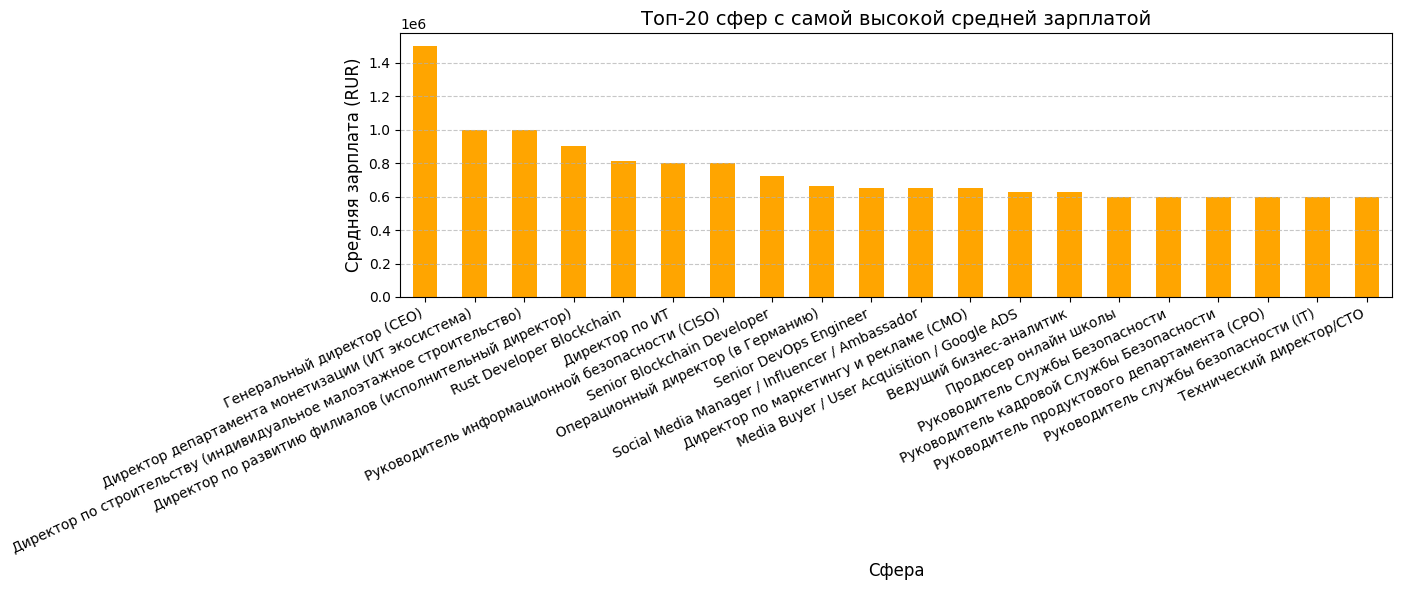

In [145]:
# --- Средняя зарплата по сферам ---
df_it = df[df["Vacancy"].str.contains("Разработчик|Программист|Data|Аналитик", na=False)] # Фильтруем вакансии, относящиеся к IT
df_it = df_it[df_it["Key_skills"].notna() & (df_it["Key_skills"] != "Не указано")] # Исключаем "Не указано" перед разбиением строк
it_skills = ', '.join(df_it["Key_skills"]).split(', ') # Объединяем все навыки в одну строку и разбиваем их по запятой
skill_counts = Counter(it_skills) # Подсчитываем частоту встречаемости каждого навыка
top_it_skills = dict(skill_counts.most_common(20)) # Берем топ-20 самых популярных навыков

# Строим график
plt.figure(figsize=(10, 5))
plt.bar(top_it_skills.keys(), top_it_skills.values(), color='blue')
plt.xlabel("Навыки")
plt.ylabel("Частота")
plt.title("Частота упоминания IT-технологий в вакансиях")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Количества вакансий по дате публикации ---
df["Published_at"] = pd.to_datetime(df["Published_at"], errors='coerce')
df_date = df.groupby(df["Published_at"].dt.date).size()
plt.figure(figsize=(12, 5))
df_date.plot(kind="line", marker="o", linestyle="-", color="green")
plt.xlabel("Дата публикации")
plt.ylabel("Количество вакансий")
plt.title("Количество вакансий по дате публикации")
plt.xticks(rotation=45)
plt.show()

# --- Средняя зарплата по компаниям (Топ-10) ---
top_companies = df.groupby("Employer_name")["Salary_from"].mean().nlargest(10)
plt.figure(figsize=(10, 5))
top_companies.plot(kind="bar", color='purple')
plt.xlabel("Компания")
plt.ylabel("Средняя зарплата (RUR)")
plt.title("Средняя зарплата по компаниям (Топ-10)")
plt.xticks(rotation=45)
plt.show()

# --- Корреляция между опытом и зарплатой ---
experience_mapping = {0: 0, 1: 2, 2: 4, 3: 7}
df["Experience_numeric"] = df["Experience"].map(experience_mapping)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Experience_numeric", y="Salary_from", alpha=0.5)
plt.xlabel("Опыт (в годах)")
plt.ylabel("Зарплата (RUR)")
plt.title("Корреляция между опытом и размером зарплаты")
plt.show()

# --- Распределение зарплат (общая гистограмма) ---
plt.figure(figsize=(10, 5))
sns.histplot(df["Salary_from"].dropna(), bins=30, kde=True, color='red')
plt.xlabel("Зарплата (RUR)")
plt.ylabel("Количество вакансий")
plt.title("Распределение зарплат")
plt.show()

# --- Самые редкие ключевые навыки ---
print('Самые редкие ключевые навыки:')
rare_skills = dict(skill_counts.most_common()[-20:])  # Берем 20 самых редких навыков
# Преобразуем данные в DataFrame для удобства
rare_skills_df = pd.DataFrame(list(rare_skills.items()), columns=['Skill', 'Count'])
print(rare_skills_df)

# --- Средняя зарплата по сферам ---
df['Salary_from'] = pd.to_numeric(df['Salary_from'], errors='coerce') # Преобразуем зарплаты в числовой формат (заменяя ошибки на NaN)
top_vacancies = df.groupby("Vacancy")["Salary_from"].mean().nlargest(20) # Группируем по сфере и берем 20 с наибольшей средней зарплатой
plt.figure(figsize=(14, 6))
top_vacancies.plot(kind="bar", color='orange')
plt.xlabel("Сфера", fontsize=12)
plt.ylabel("Средняя зарплата (RUR)", fontsize=12)
plt.title("Топ-20 сфер с самой высокой средней зарплатой", fontsize=14)
plt.xticks(rotation=25, ha="right")  # Наклоняем подписи оси X для лучшей читаемости
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Добавляем горизонтальные линии сетки
plt.tight_layout()  # Делаем график аккуратным
plt.show()